# **FootPrintNet**: Una Red Neuronal Convolucional para la Clasificación Precisa de Inclinación de Huellas Podales

* Encinas Velazquez, Milthon Eduardo
* Pivac Alcaraz, Vesna Camile
* Minjares Neriz, Victor Manuel

## Problema

El **análisis de la huella podal** mediante podograma o impresión gráfica de la planta, es una herramienta muy útil para caracterizar el apoyo de cada pie en contacto con la superficie, además, es procedimentalmente sencilla y provista de validez. Esta es utilizada principalmente en asignaturas del área biomédica tales como Kinesiología y Biomecánica, requiere de unos conocimientos previos de las asignaturas de Matemática y Biofísica. Los conceptos de línea recta, paralelismo, perpendicularidad, ángulo, longitud, área, razón, proporción, intervalo, porcentaje, los conceptos físicos de fuerza y presión, así como las leyes de Newton implicadas en la transmisión de cargas, fuerzas externas e internas, acciones y reacciones, son fundamentales para que el estudiante comprenda esta importante aplicación que permite estudiar las condiciones de bipedestación del cuerpo humano, e identificar situaciones patológicas que afectan la postura y que pueden intervenirse oportunamente. 

Un caminar correcto o una marcha adecuada es de suma importancia para la salud y el bienestar general de una persona. A continuación, se mencionan algunas razones por las cuales es relevante:

- *Funcionalidad física:* Una marcha adecuada permite que una persona realice sus actividades diarias con facilidad y eficiencia. Caminar correctamente garantiza una movilidad fluida, lo que facilita tareas como desplazarse, subir escaleras, levantar objetos, entre otras actividades básicas.

- *Salud musculoesquelética:* Una marcha adecuada implica un patrón de movimiento óptimo que distribuye de manera equilibrada la carga y el estrés en las diferentes estructuras musculoesqueléticas del cuerpo. Esto ayuda a mantener una alineación adecuada de las articulaciones, previene lesiones y minimiza el desgaste excesivo en ciertas áreas del cuerpo.

- *Coordinación y equilibrio:* Caminar correctamente implica una buena coordinación y equilibrio. Una marcha adecuada requiere que los músculos y los sistemas nervioso y vestibular trabajen juntos de manera coordinada para mantener la estabilidad durante el movimiento. Esto es esencial para prevenir caídas y lesiones relacionadas.

- *Salud cardiovascular:* La marcha regular y adecuada contribuye a mantener un sistema cardiovascular saludable. Caminar es una forma de ejercicio de bajo impacto que mejora la circulación sanguínea, fortalece el corazón y los vasos sanguíneos, y ayuda a controlar la presión arterial y el nivel de colesterol.

- *Bienestar mental:* El acto de caminar de forma correcta también tiene beneficios para la salud mental. Se ha demostrado que el ejercicio aeróbico, como caminar, promueve la liberación de endorfinas, hormonas que generan sensaciones de bienestar y reducen el estrés y la ansiedad. Una marcha adecuada puede ayudar a mejorar el estado de ánimo y la salud mental en general.

La identificación de inclinaciones en las huellas plantares supone una herramienta importante para la detección de *trastornos de la marcha*, éstos se refieren a condiciones anatómicas que afectan la capacidad del cuerpo para caminar correctamente, que a su vez, dichas alteraciones pueden tener orígenes diversos y pueden reflejar el estado de salud de diversos sistemas y aparatos del cuerpo humano que estarían causando dicho trastorno.

El **objetivo** de nuestro trabajo es crear una red neuronal que pueda identificar las inclinaciones en las huellas plantares, ésto con el propósito de facilitar el diagnóstico de un posible *trastorno de la marcha* utilizando una red neuronal que acepta una matriz de entrada con los datos proporcionados por imágenes en escala de grises y nos indique qué tipo de inclinación presenta la huella plantar.

### Datos

Los datos fueron obtenidos del dataset de kaggle [Pressure Sensor Heatmap-RGB](https://www.kaggle.com/datasets/mahdiislam/pressure-sensor-heatmaprgb?resource=download).

El dataset cuenta con los siguiente dos archivos .pickle:
- **X_9_RGB**: Contiene las imágenes de las huellas plantares del paciente en mapas de calor. 
- **Y_9_RGB**: Contiene las etiquetas, números enteros, asociadas a cada imagen que nos dice el diagnóstico.

Los diagnósticos son los siguientes :

 <table>
  <tr>
    <th>Imagen</th>
    <th>Etiqueta</th>
  </tr>
  <tr>
    <td>Pie normal</td>
    <td>0</td>
  </tr>
  <tr>
    <td>Pie izquierdo inclinado hacia adelante</td>
    <td>1</td>
  </tr>
  <tr>
    <td>Pie derecho inclinado hacia adelante</td>
    <td>2</td>
  </tr>
  <tr>
    <td>Pie izquierdo inclinado hacia atrás</td>
    <td>3</td>
  </tr>
  <tr>
    <td>Pie derecho inclinado hacia atrás</td>
    <td>4</td>
  </tr>
  <tr>
    <td>Inclinación del lado izquierdo</td>
    <td>5</td>
  </tr>
  <tr>
    <td>Inclinación hacia la derecha</td>
    <td>6</td>
  </tr>
  <tr>
    <td>Pie izquierdo torcido</td>
    <td>7</td>
  </tr>
  <tr>
    <td>Pie derecho torcido</td>
    <td>8</td>
  </tr>
</table>



## Red Neuronal

### Librerías 

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
from PIL import Image
from keras import backend as K
from keras.models import load_model
# from keras.preprocessing.image import img_to_array
from tensorflow.keras.utils import img_to_array
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.callbacks import ReduceLROnPlateau
import tensorflow as tf
import matplotlib.pyplot as plt
from numpy import expand_dims
# from keras.preprocessing.image import load_img
from tensorflow.keras.utils import load_img
# from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
import os
import PIL
import cv2
#import opencv as cv2
import os
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from keras.models import model_from_json, model_from_yaml
import pickle
print(tf.__version__)

2.12.0


### Preparación de los datos 

In [2]:
with open('X_9_RGB.pickle', 'rb') as f :
    img = pickle.load(f)

with open('Y_9_RGB.pickle', 'rb') as f :
    labels = pickle.load(f)

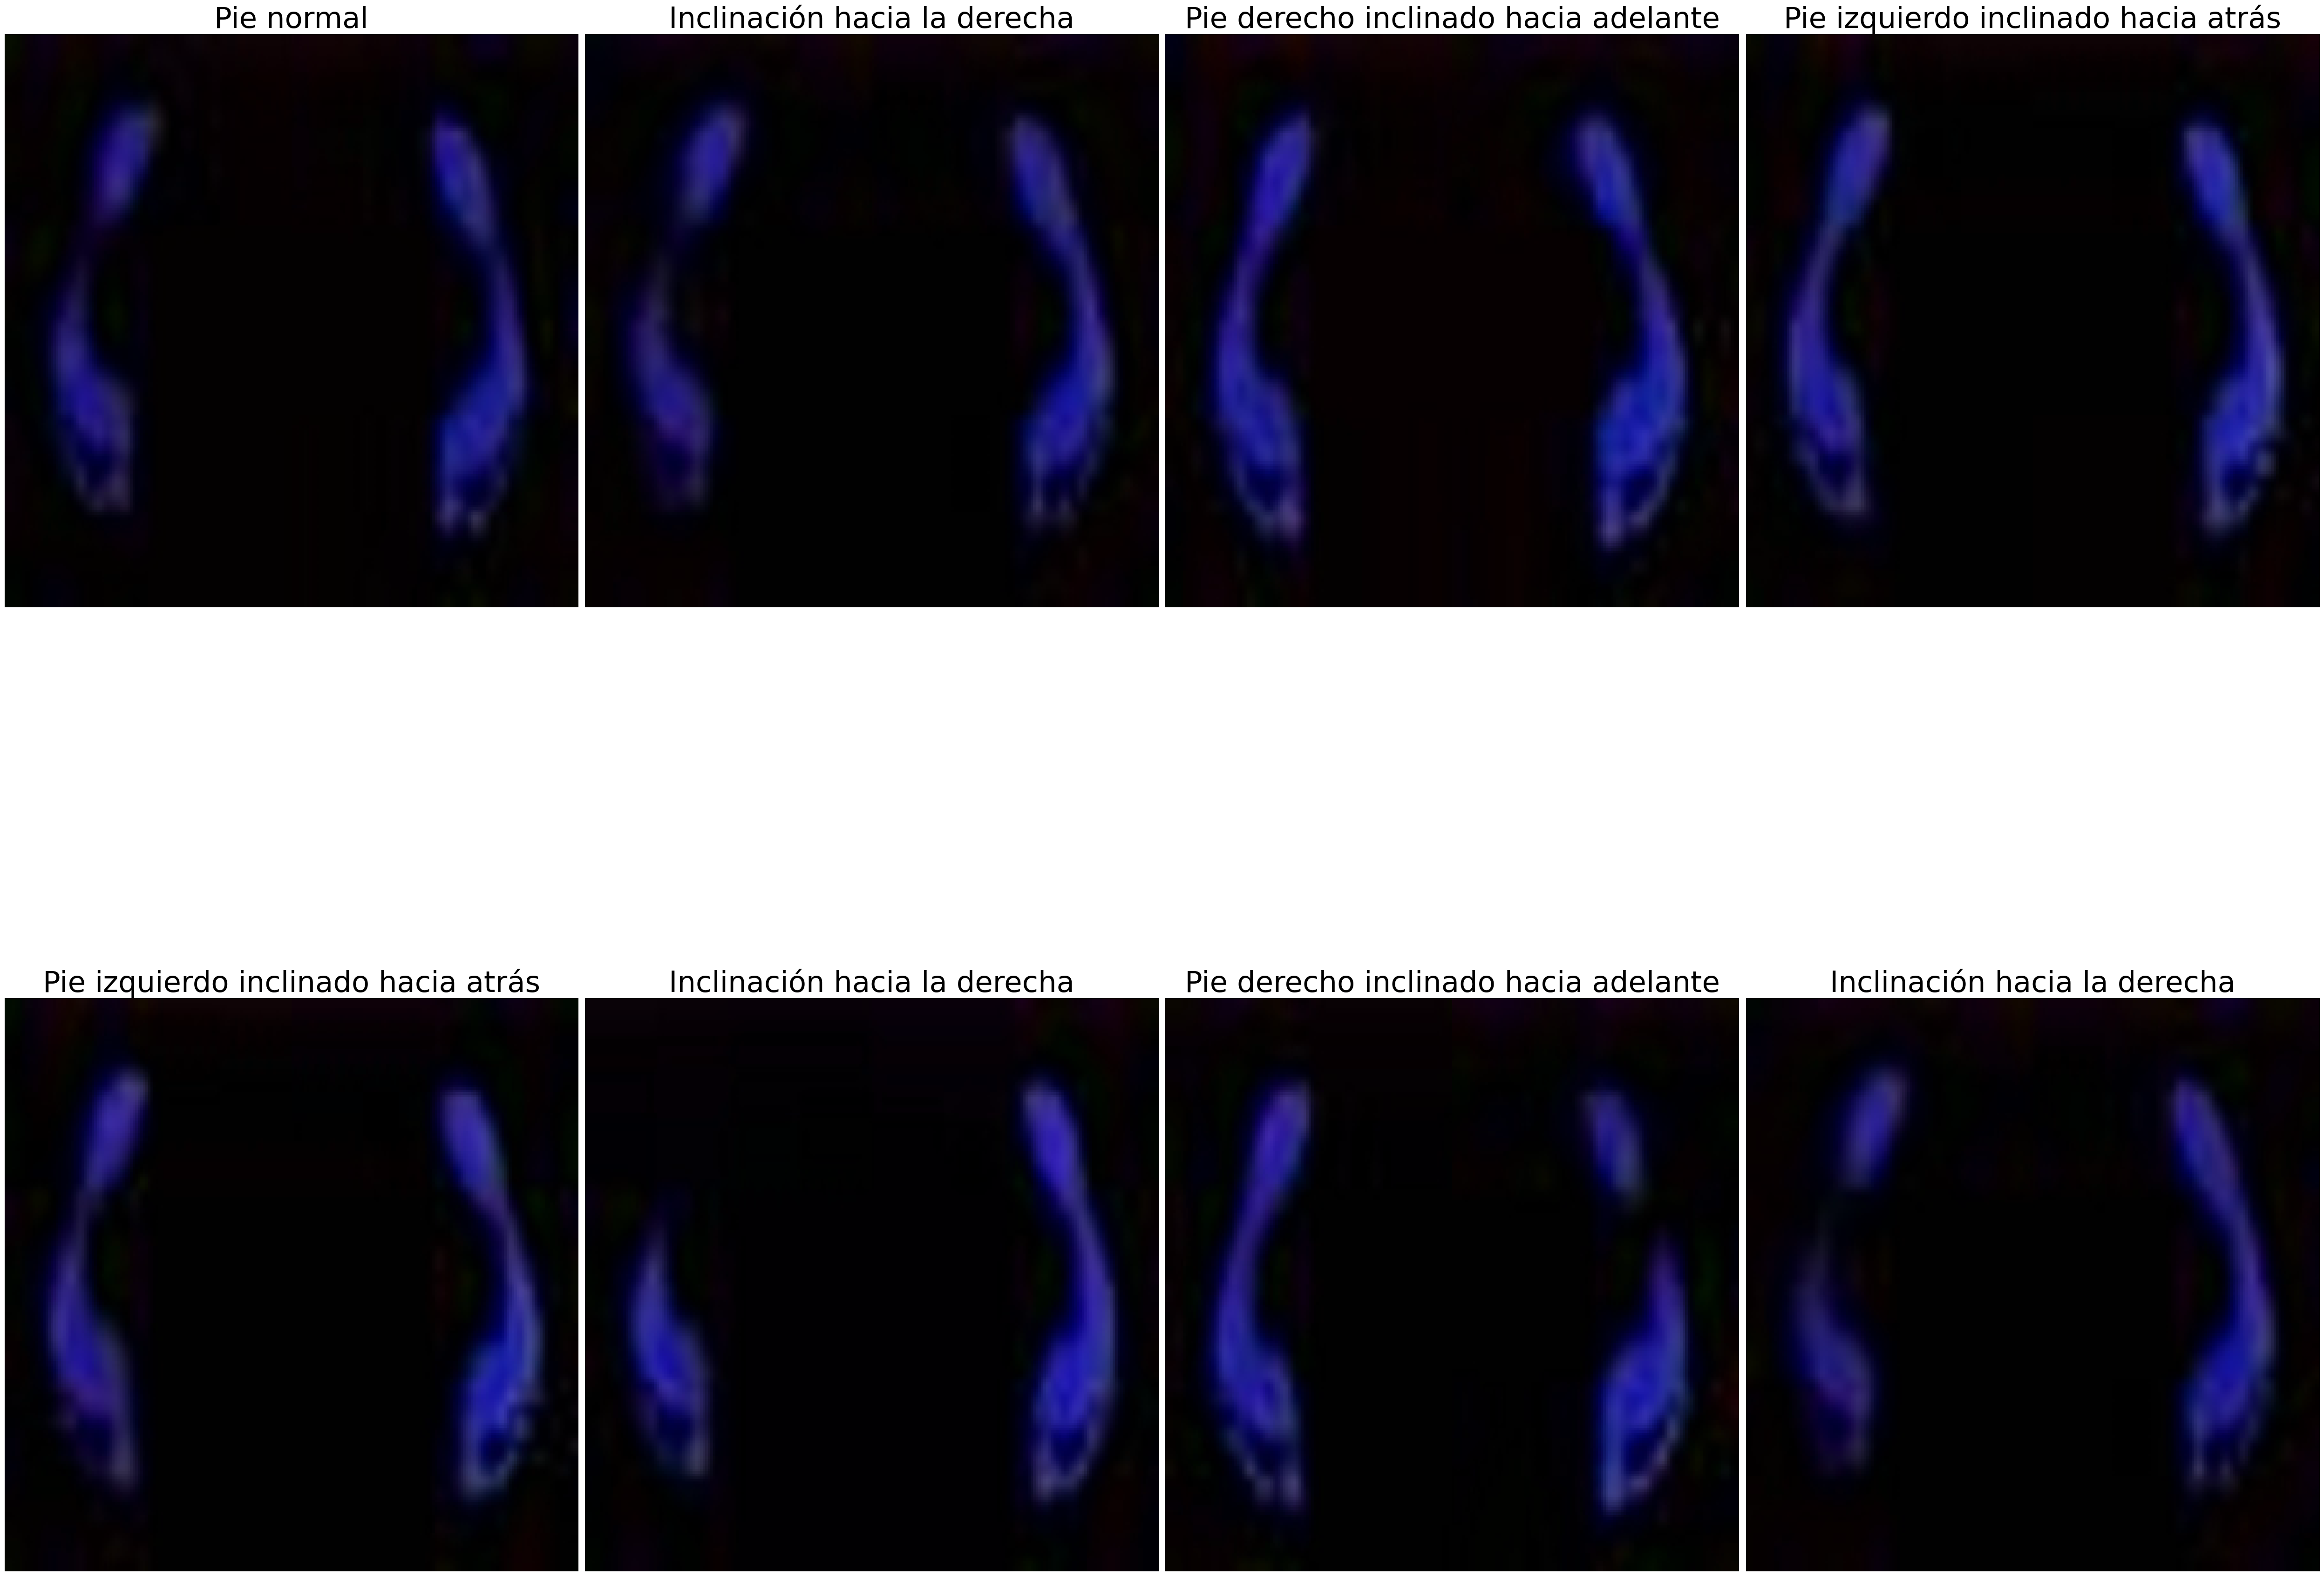

In [4]:
# Visualización de los datos

diagnostic = {
    0: "Pie normal",
    1: "Pie izquierdo inclinado hacia adelante",
    2: "Pie derecho inclinado hacia adelante",
    3: "Pie izquierdo inclinado hacia atrás",
    4: "Pie derecho inclinado hacia atrás",
    5: "Inclinación del lado izquierdo",
    6: "Inclinación hacia la derecha",
    7: "Pie izquierdo torcido",
    8: "Pie derecho torcido",
}

fig = plt.figure(figsize=(50, 50)) 

for i in range(0, 8):
    sub = fig.add_subplot(2, 4, i + 1)
    sub.imshow(img[i])
    sub.axis('off')
    sub.set_title(diagnostic[labels[i]], fontsize=45)

plt.tight_layout()

plt.show()

In [9]:
print("Dimensión de los datos: ", img.shape)

# Separamos los datos de entrenamiento de los de testeo
train_img, test_img, train_labels, test_labels = train_test_split(img, labels, test_size = 0.2, random_state = 14)

# Vemos la dimension de los datos
print("Dimensión de los datos de entrenamiento:", train_img.shape)
print("Etiqueta de los datos de entrenamiento:", train_labels.shape)
print("Dimensión de los datos de testeo:", test_img.shape)
print("Etiqueta de los datos de testeo:", test_labels.shape) 

Dimensión de los datos:  (1801, 224, 224, 3)
Dimensión de los datos de entrenamiento: (1440, 224, 224, 3)
Etiqueta de los datos de entrenamiento: (1440,)
Dimensión de los datos de testeo: (361, 224, 224, 3)
Etiqueta de los datos de testeo: (361,)


### Formateamos los datos para entrenar la red neuronal

In [10]:
IMG_SHAPE  = 224
batch_size = 8

In [11]:
# Inicializamos el metodo de flujo para los datos de entrenamiento y testeo
image_gen_train = ImageDataGenerator(rescale = 1./255)  # Reescalamos la imagen
train_data_gen = image_gen_train.flow(
    x = train_img,
    y = train_labels,
    shuffle = True,
    batch_size = batch_size,
    seed = 14
)

image_gen_test = ImageDataGenerator(rescale = 1./255)  # Reescalamos la imagen
test_data_gen = image_gen_test.flow(
    x = test_img,
    y = test_labels,
    shuffle = False,
    batch_size = batch_size,
    seed = 14
)

### Modelo VGG16 

Estamos utilizando una red neuronal pre-entrenada llamada VGG16, una de las joyas de la corona en el mundo del aprendizaje profundo. VGG16 es un modelo de red neuronal convolucional que fue entrenado en más de un millón de imágenes del conjunto de datos ImageNet, que contiene imágenes de 1000 categorías diferentes. Este modelo ha aprendido a reconocer una variedad de características en las imágenes, desde bordes y texturas hasta objetos más complejos.

La función tf.keras.applications.VGG16 nos permite cargar este modelo pre-entrenado en nuestro código. Los parámetros que le pasamos a esta función nos permiten personalizar cómo queremos utilizar este modelo.

El primer parámetro, input_shape=(IMG_SHAPE, IMG_SHAPE, 3), define la forma de las imágenes que vamos a pasar al modelo. IMG_SHAPE es la altura y la anchura de las imágenes (en píxeles), y 3 se refiere a los tres canales de color (rojo, verde y azul) de las imágenes.

El segundo parámetro, include_top=False, nos dice que no queremos incluir la última capa de la red VGG16. Esta capa se utiliza para la clasificación final en el conjunto de datos ImageNet, pero como vamos a utilizar este modelo para nuestras propias tareas, no necesitamos esta capa.

Finalmente, el tercer parámetro, weights="imagenet", nos permite cargar los pesos que el modelo aprendió durante su entrenamiento en ImageNet. Estos pesos son el conocimiento que el modelo ha adquirido sobre cómo reconocer diferentes características en las imágenes.

In [12]:
pre_trained_model = tf.keras.applications.VGG16(input_shape=(IMG_SHAPE, IMG_SHAPE, 3), include_top=False, weights="imagenet")

En el siguiente bloque de codigo definimos la arquitectura de nuestro modelo para nuestro dataset. Comenzamos obteniendo la última capa de la red VGG16, llamada 'block5_pool', que es la última capa de pooling de la red. Esta capa ha aprendido a reconocer características de alto nivel en las imágenes. Obtenemos la salida de esta capa y la almacenamos en last_output.

A continuación, añadimos una capa de GlobalMaxPooling2D a nuestra red. Esta capa reduce la dimensionalidad de sus entradas tomando el valor máximo de cada canal en cada mapa de características. Esto nos ayuda a reducir la cantidad de parámetros que nuestra red necesita aprender, lo que puede ayudar a prevenir el sobreajuste.

Después de la capa de pooling, añadimos una capa densa (o completamente conectada) con 512 neuronas y una función de activación ReLU. Esta capa puede aprender a reconocer patrones más complejos en las características extraídas por las capas anteriores.

A continuación, añadimos una capa de Dropout con una tasa de 0.5. Esta capa "apaga" aleatoriamente la mitad de las neuronas en la capa anterior durante cada paso de entrenamiento, lo que también ayuda a prevenir el sobreajuste.

Finalmente, añadimos otra capa densa con 9 neuronas y una función de activación sigmoide. Esta es nuestra capa de salida. Cada neurona en esta capa representa una de las 9 clases que nuestra red puede predecir, y la función de activación sigmoide asegura que la salida de cada neurona esté entre 0 y 1, lo que podemos interpretar como la probabilidad de que la imagen de entrada pertenezca a cada clase.

In [14]:
# Arquitectura
last_layer = pre_trained_model.get_layer('block5_pool')
last_output = last_layer.output
x = tf.keras.layers.GlobalMaxPooling2D()(last_output)
x = tf.keras.layers.Dense(512, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(9, activation='sigmoid')(x)

La función tf.keras.Model() se utiliza para crear un nuevo modelo de Keras. Esta función toma dos argumentos principales: las entradas al modelo y las salidas del modelo.

En este caso, estamos pasando pre_trained_model.input como la entrada a nuestro nuevo modelo. Esto significa que nuestro modelo tomará la misma entrada que la red VGG16 pre-entrenada, es decir, una imagen de la forma que especificamos cuando cargamos la red VGG16.

El segundo argumento es x, que es la última capa que hemos definido en nuestro modelo personalizado. Esto significa que la salida de nuestro nuevo modelo será la salida de esta capa.

La siguiente línea de código está creando un nuevo modelo que combina la red pre-entrenada VGG16 y nuestras capas personalizadas. Cuando pasamos una imagen a este modelo, la imagen primero pasará a través de la red VGG16, luego las características extraídas por VGG16 pasarán a través de nuestras capas personalizadas, y finalmente nuestra red producirá una predicción de 9 clases para la imagen.

In [15]:
model = tf.keras.Model(pre_trained_model.input, x)

La función compile en Keras del siguiente bloque de código se utiliza para configurar el proceso de aprendizaje del modelo. Toma tres argumentos principales: el optimizador, la función de pérdida y las métricas.

El primer argumento, optimizer='adam', establece el optimizador que se utilizará durante el entrenamiento. El optimizador es el algoritmo que el modelo utilizará para ajustar sus pesos en respuesta a los errores que comete durante el entrenamiento. 'Adam' es un optimizador muy popular que combina dos extensiones del descenso de gradiente estocástico: AdaGrad y RMSProp.

El segundo argumento, loss=tf.keras.losses.sparse_categorical_crossentropy, establece la función de pérdida que el modelo tratará de minimizar durante el entrenamiento. La función de pérdida mide qué tan bien el modelo está haciendo en sus predicciones: cuanto menor sea la pérdida, mejor será el modelo en la predicción de las etiquetas correctas. sparse_categorical_crossentropy es una función de pérdida común para problemas de clasificación multiclase donde las etiquetas son enteros.

El tercer argumento, metrics=['acc'], le dice al modelo que registre la precisión de la clasificación (la proporción de predicciones correctas) durante el entrenamiento. Esto nos permitirá monitorear el rendimiento del modelo a medida que se entrena.

In [16]:
model.compile(optimizer='adam', loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=['acc'])

In [17]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

### Entrenamiento

En el siguiente bloque de código, se esta llamando a fit en el modelo y pasándole varios argumentos que controlan cómo se realiza el entrenamiento.

El primer argumento, train_data_gen, es el generador de datos de entrenamiento que alimentará las imágenes y las etiquetas al modelo durante el entrenamiento.

El segundo argumento, steps_per_epoch=50, define cuántos lotes de datos procesará el modelo antes de considerar que ha completado una "época" de entrenamiento. En este caso, estás diciendo que una época consta de 50 pasos.

El tercer argumento, epochs=10, define cuántas épocas quieres entrenar tu modelo. En este caso, estás entrenando tu modelo durante 10 épocas.

El cuarto argumento, batch_size=batch_size, define cuántas imágenes procesará el modelo a la vez. El tamaño del lote puede afectar tanto a la velocidad de entrenamiento como a la calidad del modelo final.

El último argumento, verbose=1, controla cuánta información se imprime durante el entrenamiento. Un valor de 1 significa que se imprimirá información sobre el progreso de cada época.

In [16]:
vgg_classifier = model.fit(train_data_gen,
  steps_per_epoch=(50), # train_img.shape[0]//batch_size 
  epochs = 10, 
  batch_size = batch_size,
  verbose = 1)

Epoch 1/10
50/50 [==============================] - 97s 2s/step - loss: 1.4887 - acc: 0.4725
Epoch 2/10
50/50 [==============================] - 95s 2s/step - loss: 1.3414 - acc: 0.5325
Epoch 3/10
50/50 [==============================] - 94s 2s/step - loss: 1.2458 - acc: 0.5900
Epoch 4/10
50/50 [==============================] - 101s 2s/step - loss: 1.1116 - acc: 0.6450
Epoch 5/10
50/50 [==============================] - 104s 2s/step - loss: 1.0153 - acc: 0.6825
Epoch 6/10
50/50 [==============================] - 101s 2s/step - loss: 1.0195 - acc: 0.6875
Epoch 7/10
50/50 [==============================] - 134s 3s/step - loss: 0.8876 - acc: 0.7100
Epoch 8/10
50/50 [==============================] - 140s 3s/step - loss: 0.8326 - acc: 0.7450
Epoch 9/10
50/50 [==============================] - 140s 3s/step - loss: 0.8077 - acc: 0.7450
Epoch 10/10
50/50 [==============================] - 110s 2s/step - loss: 0.7343 - acc: 0.7625


### Testeo

In [17]:
result = model.evaluate(test_data_gen,batch_size=batch_size)
print("test_loss, test accuracy",result)

46/46 [==============================] - 121s 3s/step - loss: 0.6715 - acc: 0.8089
test_loss, test accuracy [0.6715244054794312, 0.8088642954826355]


### Resultados

In [33]:
Y_pred = model.predict(test_data_gen, 50) # test_img.shape[0]//batch_size
y_pred = np.argmax(Y_pred, axis=1)
print('Matriz de confusión ')
print(confusion_matrix(test_data_gen.y, y_pred))
print('')
print('Reporte de clasificación ')
target_names = list(diagnostic.values())
print(classification_report(test_data_gen.y, y_pred, target_names=target_names))

46/46 [==============================] - 82s 2s/step
Matriz de confusión 
[[25  0  1  0  0  0  0  2  0]
 [ 3 21  1  0  0  0  7 13  0]
 [ 1  1 31  0  0  0  0  7  2]
 [ 0  0  0 28  1  0  9  0  0]
 [ 0  0  0  2 28  1  2  1  0]
 [ 1  0  0  0  0 29  1  0  4]
 [ 0  0  0  0  0  0 41  0  0]
 [ 0  0  0  0  0  0  0 45  5]
 [ 0  0  0  0  1  0  0  3 44]]

Reporte de clasificación 
                                        precision    recall  f1-score   support

                            Pie normal       0.83      0.89      0.86        28
Pie izquierdo inclinado hacia adelante       0.95      0.47      0.63        45
  Pie derecho inclinado hacia adelante       0.94      0.74      0.83        42
   Pie izquierdo inclinado hacia atrás       0.93      0.74      0.82        38
     Pie derecho inclinado hacia atrás       0.93      0.82      0.87        34
        Inclinación del lado izquierdo       0.97      0.83      0.89        35
          Inclinación hacia la derecha       0.68      1.00      0.

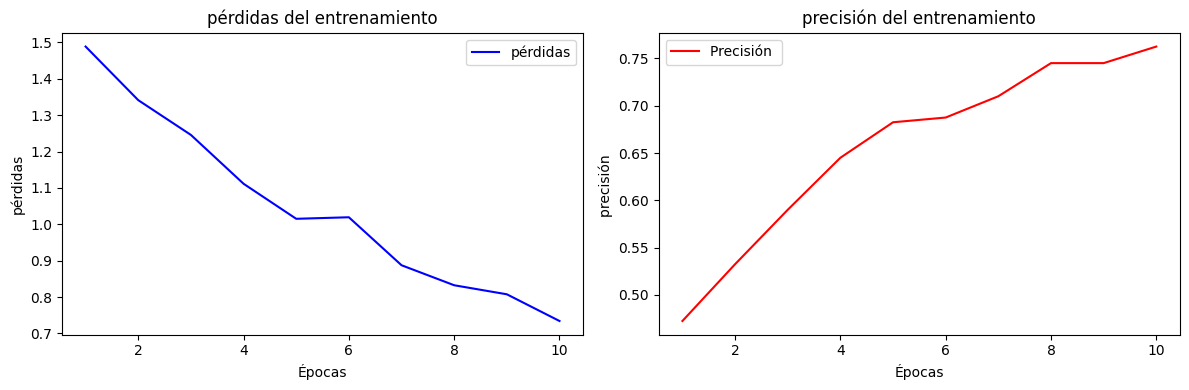

In [34]:
# Obtenemos el historial de entrenamiento
train_loss = vgg_classifier.history['loss']
train_accuracy = vgg_classifier.history['acc']

# Creamos el gráfico
epochs = range(1, len(train_loss) + 1)

plt.figure(figsize=(12, 4))

# gráfica de pérdidas 
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'b', label='pérdidas')
plt.title('pérdidas del entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('pérdidas')
plt.legend()

# gráfica de precisión 
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, 'r', label='Precisión ')
plt.title('precisión del entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('precisión ')
plt.legend()

plt.tight_layout()
plt.show()

### Conclusiones

Basado en los resultados del testeo de nuestro modelo neuronal, se puede concluir que la pérdida promedio obtenida es de 0.6715. Este valor indica el error promedio durante la etapa de prueba. Es importante destacar que un valor más bajo de pérdida es deseable, ya que indica que el modelo está realizando predicciones más precisas. En este caso, el valor de pérdida obtenido es relativamente alto, lo que sugiere que nuestras predicciones pueden tener cierto grado de imprecisión.

Por otro lado, la precisión obtenida en el testeo es del 80.89%. Esto significa que el modelo ha clasificado correctamente el tipo de inclinación de las huellas de pies en aproximadamente el 80.89% de los casos. Esta precisión es considerada decente, ya que indica que el modelo está aprendiendo y haciendo predicciones razonablemente buenas en la tarea de clasificación.

La red neuronal muestra resultados prometedores en la clasificación de diferentes tipos de inclinación de huellas de pies. La mayoría de las clases tienen altos valores de precisión, recall y F1-score, lo que indica que el modelo es capaz de identificar correctamente esas clases. Por ejemplo, las clases "Pie normal", "Pie izquierdo inclinado hacia adelante" y "Pie derecho inclinado hacia adelante" tienen altos valores de precisión (83%, 95% y 94% respectivamente), lo que indica que el modelo hace predicciones precisas para estas categorías. Sin embargo, algunas clases muestran valores más bajos en algunas métricas. Por ejemplo, la clase "Inclinación hacia la derecha" tiene una precisión del 68%, lo que indica que el modelo puede tener dificultades para identificar correctamente esta inclinación en particular.

En general, el modelo tiene un accuracy (precisión global) del 81%, lo que significa que acierta en aproximadamente el 81% de las predicciones en el conjunto de datos de prueba. Aunque esta cifra es aceptable, se debe tener en cuenta que existen oportunidades para mejorar el rendimiento, especialmente en las clases con valores más bajos en algunas métricas.

### Gardamos el modelo

In [35]:
model.save('modeloFootPrintNet', overwrite=True)
tf.keras.models.save_model(model,"modeloFootPrintNet.h5")

INFO:tensorflow:Assets written to: modeloVGG16pies\assets


INFO:tensorflow:Assets written to: modeloVGG16pies\assets


## Referencias

- https://www.kaggle.com/datasets/mahdiislam/pressure-sensor-heatmaprgb
- Shiang, T. Y., Lee, S. H., Lee, S. J. y Chu, W. C. (1998). Evaluating different footprint parameters as a predictor of arch height. IEEE Engineering in Medicine and Biology Magazine, 17 (6), 62-66.